## Exploratory Data Analysis
### Here, we are going to have a look at how our datasets looks like:
We are using [BOSSbase](http://agents.fel.cvut.cz/boss/index.php?mode=VIEW&tmpl=materials) dataset. Originally, it contains of 10000 - 512x512 grayscale images (in portable graymap format)<br>
But, we are going to use limited number of images from the dataset downsized to **256x256**. <br>
Our algorithms will be randomly using around **2x500** images for training (for experimental purpose- we took 400 cover and 600 stego), **2x50** for validation and **2X50** for testing purposes. (due to limited computational power)

The Stego images are generated using [HUGO](http://dde.binghamton.edu/download/stego_algorithms/) algorithm with 0.4bbp.

In [27]:
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image
from keras.preprocessing.image import load_img, img_to_array,ImageDataGenerator
%matplotlib inline

In [2]:
path = '/home/iamsmit96/dataset/boss/'

##### The number of cover and stego images in **training** set are as follows:

In [3]:
len(os.listdir('/home/iamsmit96/dataset/boss/train/cover/')), len(os.listdir('/home/iamsmit96/dataset/boss/train/stego/'))

(400, 600)

##### The number of cover and stego images in **test** set are as follows:

In [4]:
len(os.listdir('/home/iamsmit96/dataset/boss/test/cover/')), len(os.listdir('/home/iamsmit96/dataset/boss/test/stego/'))

(100, 100)

##### The number of cover and stego images in **validation** set are as follows:

In [5]:
len(os.listdir('/home/iamsmit96/dataset/boss/validation/cover/')), len(os.listdir('/home/iamsmit96/dataset/boss/validation/stego/'))

(100, 100)

##### Here, we can see four images from dataset .
##### Two images on left column are **Cover** Images and Two images on right column are **Stego** Images.
##### We can observe that there almost no difference between two types of images.

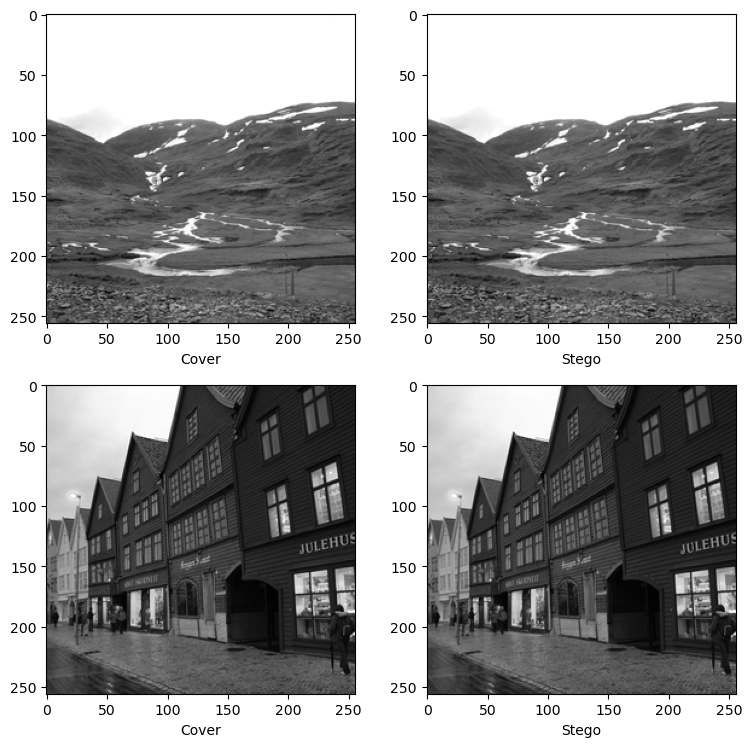

In [117]:
image1 = Image.open(path + 'train/cover/1.pgm')
image2 = Image.open(path + 'train/stego/1.pgm')
image3 = Image.open(path + 'train/cover/10.pgm')
image4 = Image.open(path + 'train/stego/10.pgm')

fig = plt.figure(figsize=(9,9),dpi=100)

ax1 = fig.add_subplot(2,2,1)
ax1.set_xlabel('Cover')
_= ax1.imshow(image1,cmap ='gray')
ax2 = fig.add_subplot(2,2,2)
ax2.set_xlabel('Stego')
_= ax2.imshow(image2,cmap ='gray')
ax3 = fig.add_subplot(2,2,3)
ax3.set_xlabel('Cover')
_= ax3.imshow(image3,cmap ='gray')
ax4 = fig.add_subplot(2,2,4)
ax4.set_xlabel('Stego')
_= ax4.imshow(image4,cmap ='gray')

#### For future scope, we are going to increase the number of images in our training set as well as we are going to use ImageDataGenerator to generate additional dataset.

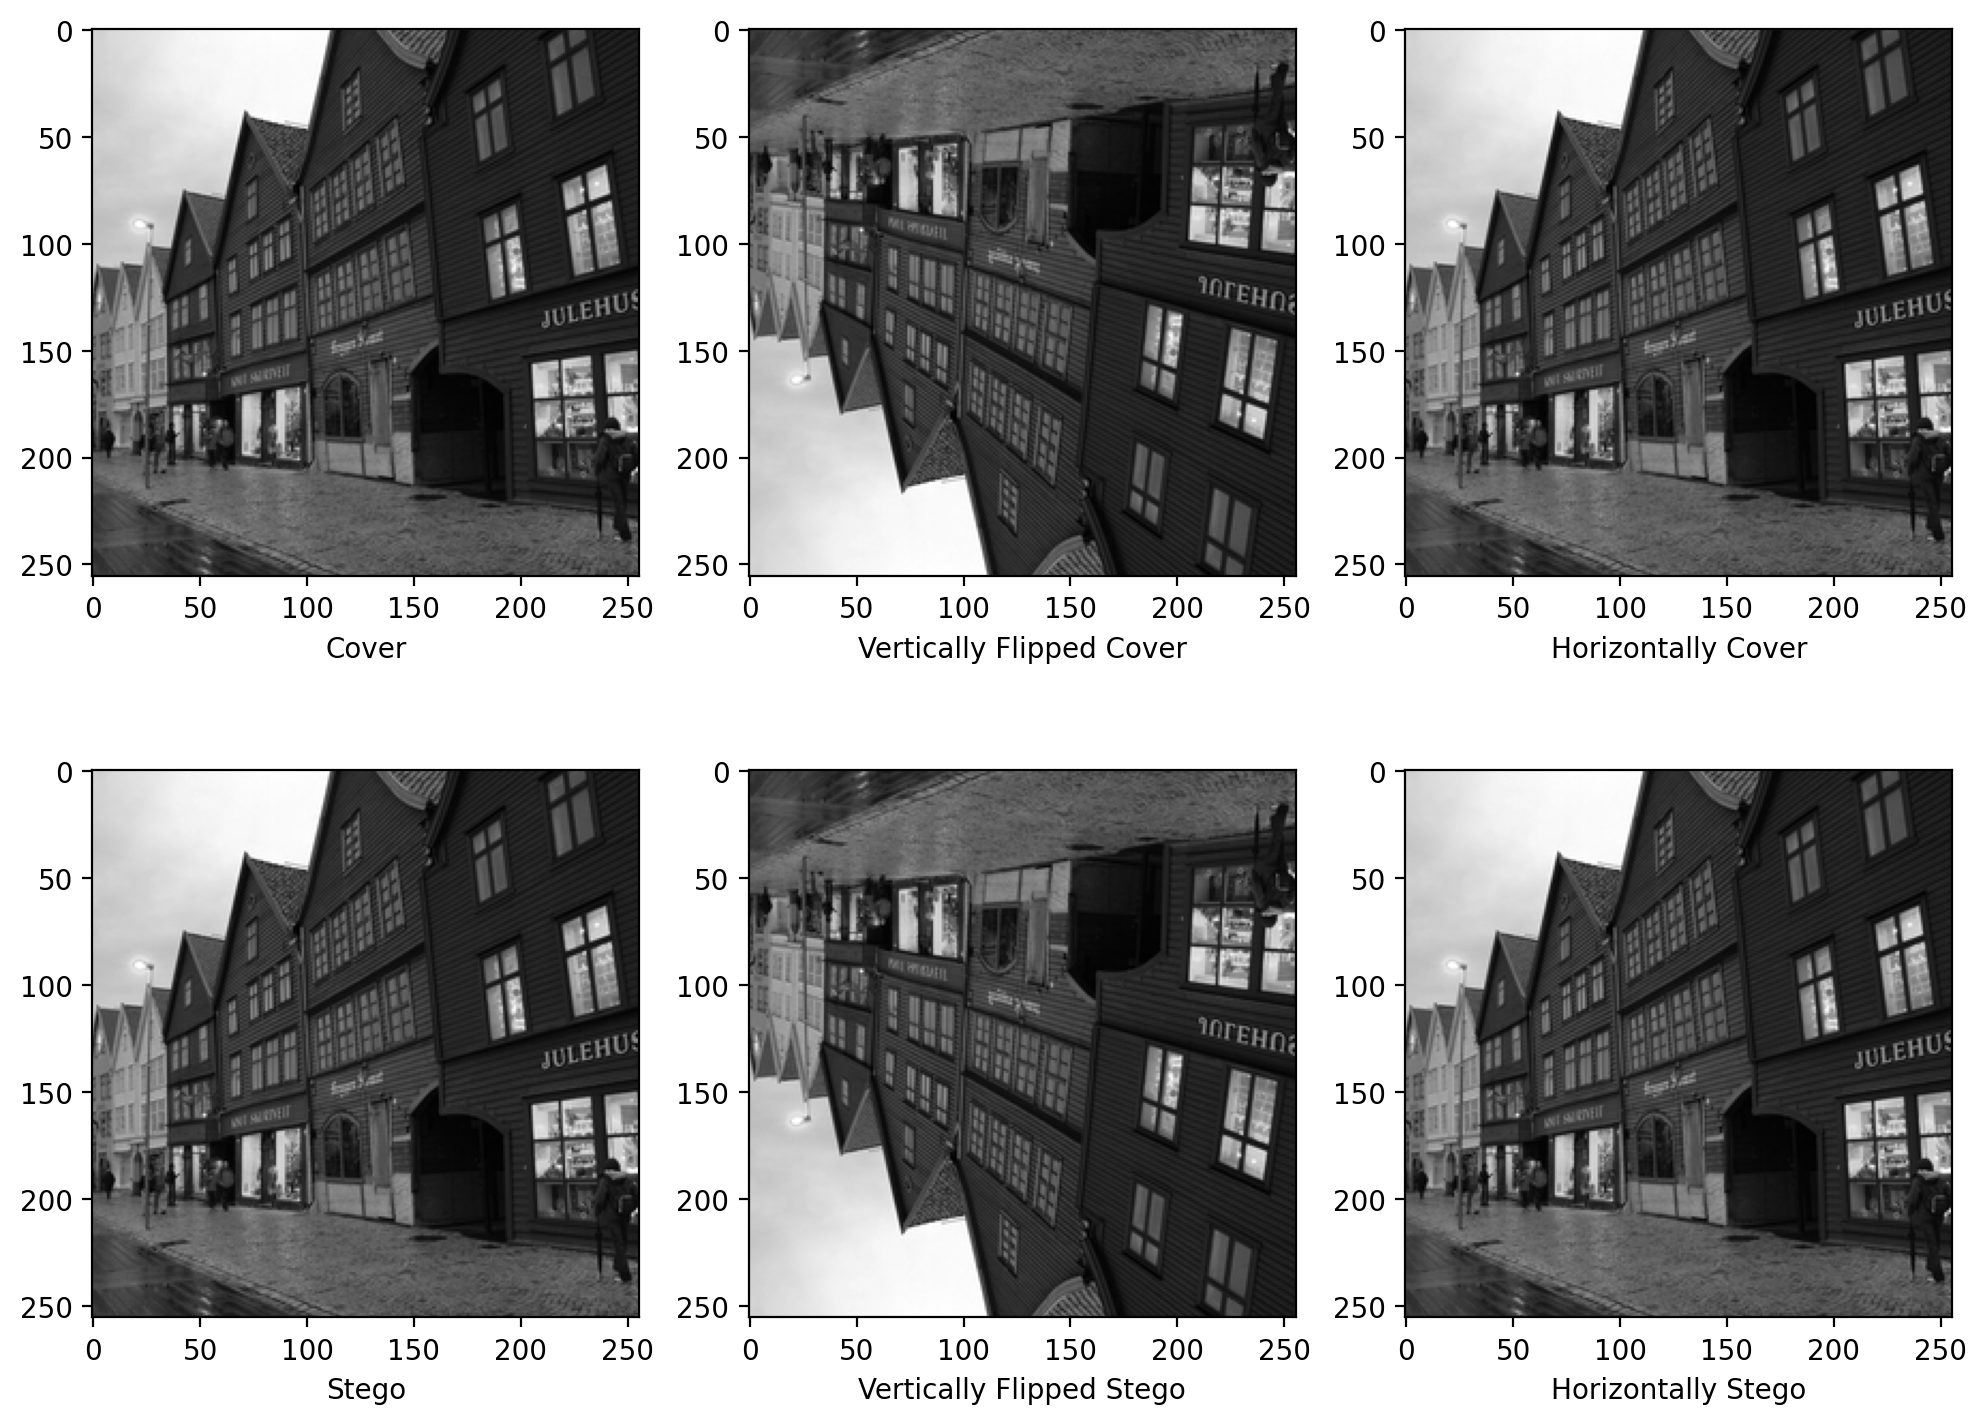

In [120]:
v_generator = ImageDataGenerator(vertical_flip=True)
h_generator = ImageDataGenerator(vertical_flip=True)
cover = img_to_array(image3)
stego = img_to_array(image4)
samples_c = np.expand_dims(cover, 0)
samples_s = np.expand_dims(stego, 0)
newC = generator.flow(samples_c,batch_size=1)
newS = generator.flow(samples_s,batch_size=1)
v_flipped = Image.fromarray(np.squeeze(newC.next().astype('uint8')))
h_flipped = Image.fromarray(np.squeeze(newS.next().astype('uint8')))

fig = plt.figure(figsize=(12,9),dpi=200)

ax1 = fig.add_subplot(2,3,1)
ax1.set_xlabel('Cover')
_ = ax1.imshow(image3,cmap ='gray')
ax2 = fig.add_subplot(2,3,2)
ax2.set_xlabel('Vertically Flipped Cover')
_ = ax2.imshow(v_flipped,cmap ='gray')
ax3 = fig.add_subplot(2,3,3)
ax3.set_xlabel('Horizontally Cover')
_ = ax3.imshow(h_flipped,cmap ='gray')

ax4 = fig.add_subplot(2,3,4)
ax4.set_xlabel('Stego')
_ = ax4.imshow(image3,cmap ='gray')
ax5 = fig.add_subplot(2,3,5)
ax5.set_xlabel('Vertically Flipped Stego')
_ = ax5.imshow(v_flipped,cmap ='gray')
ax6 = fig.add_subplot(2,3,6)
ax6.set_xlabel('Horizontally Stego')
_ = ax6.imshow(h_flipped,cmap ='gray')